⚡**Labsheet 4**

⚡**Question**

1. Implement SVM algorithm for IRIS dataset

⚡**Solution**

# SVM algorithm for IRIS dataset

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np

iris = datasets.load_iris() #Loading the dataset
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )


iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


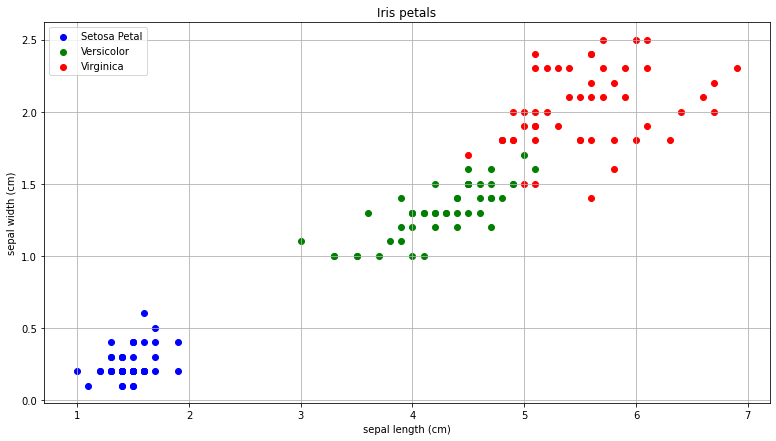

In [ ]:
import matplotlib.pyplot as plt

setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species=='versicolor']
virginica = iris[iris.species=='virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa Petal", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")

ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("sepal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

In [ ]:
from sklearn.model_selection import train_test_split

X = iris.drop(['sepal length (cm)', 'sepal width (cm)', 'target', 'species'], axis=1)
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Input the kernel from the user

kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print("Accuracy using {}:".format(kernel), accuracy_score(pred, y_test))


Accuracy using linear: 0.9518072289156626
Accuracy using rbf: 0.9879518072289156
Accuracy using poly: 1.0


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# Input the kernel from the user

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)

    pred = model.predict(X_test)

    print("Accuracy using {}:".format(kernel), accuracy_score(pred, y_test))
    

  

Accuracy using linear: 0.9518072289156626
Accuracy using rbf: 0.9879518072289156
Accuracy using poly: 1.0
